In [1]:
# This notebook is for comparing selected receptors of neuromaps with BF parcellation cortical data

# Includes:
#  Selected neuromaps - M1, nAchRs, FEOBVs
#  fetching the neuromaps
#  transofrming the maps to surface space
#  tresholding the maps for comparasion with gradients (on another notebook)
#  Visualizing the maps

In [2]:
from neuromaps import stats
from neuromaps import datasets, images, nulls, resampling
from neuromaps.datasets import available_annotations
from neuromaps.datasets import available_tags
from neuromaps.datasets import fetch_annotation
import nibabel as nib
from nilearn.plotting import plot_glass_brain
import pandas as pd
from neuromaps import transforms, plotting
import numpy as np
from brainspace.datasets import load_conte69, load_fsa5
from brainspace.plotting import plot_hemispheres
from neuromaps.datasets import fetch_fslr
from surfplot import Plot
from matplotlib import pyplot as plt   

### Setting up the path and loading necessary neuromap files

In [3]:
note_path = "/home/ROBARTS/schakraborty/graham/sudesnacPJ/21_Codes/HumanBF-Parcellation/notebook/"
data_path = "/home/ROBARTS/schakraborty/graham/sudesnacPJ/21_Codes/HumanBF-Parcellation/data/"
results_path = "/home/ROBARTS/schakraborty/graham/sudesnacPJ/21_Codes/HumanBF-Parcellation/results/Neuromaps/"
fig_path = "/home/ROBARTS/schakraborty/graham/sudesnacPJ/21_Codes/HumanBF-Parcellation/results/figures/Neuromaps/"

In [4]:
# Receptors to fetch
Aghourian_FEOBV = datasets.fetch_annotation(source='aghourian2017', desc='feobv')
Bedard_FEOBV = datasets.fetch_annotation(source='bedard2019', desc='feobv')
Tuominen_FEOBV = datasets.fetch_annotation(source='tuominen', desc='feobv')
M1 = datasets.fetch_annotation(desc='lsn3172176')
nAchRs = datasets.fetch_annotation(desc='flubatine')

In [5]:
# transform to fsaverage space
Aghourian_FEOBV_fsa = transforms.mni152_to_fsaverage(Aghourian_FEOBV, '10k')
Bedard_FEOBV_fsa = transforms.mni152_to_fsaverage(Bedard_FEOBV, '10k')
Tuominen_FEOBV_fsa = transforms.mni152_to_fsaverage(Tuominen_FEOBV, '10k')
M1_fsa = transforms.mni152_to_fsaverage(M1, '10k')
nAchRs_fsa = transforms.mni152_to_fsaverage(nAchRs, '10k')

In [6]:
# Load the tresholded data
Tr_Aghourian_FEOBV_fslr_L = images.load_gifti(results_path+'Receptor-Aghourian_FEOBV_Treshold25%_L_fsLR-32k.gii')
Tr_Aghourian_FEOBV_fslr_R = images.load_gifti(results_path+'Receptor-Aghourian_FEOBV_Treshold25%_R_fsLR-32k.gii')
Tr_Aghourian_FEOBV_fslr_L_data = Tr_Aghourian_FEOBV_fslr_L.agg_data()
Tr_Aghourian_FEOBV_fslr_R_data = Tr_Aghourian_FEOBV_fslr_R.agg_data()
Tr_Aghourian_FEOBV_fslr = (Tr_Aghourian_FEOBV_fslr_L, Tr_Aghourian_FEOBV_fslr_R)

Tr_Bedard_FEOBV_fslr_L = images.load_gifti(results_path+'Receptor-Bedard_FEOBV_Treshold25%_L_fsLR-32k.gii')
Tr_Bedard_FEOBV_fslr_R = images.load_gifti(results_path+'Receptor-Bedard_FEOBV_Treshold25%_R_fsLR-32k.gii')
Tr_Bedard_FEOBV_fslr_L_data = Tr_Bedard_FEOBV_fslr_L.agg_data()
Tr_Bedard_FEOBV_fslr_R_data = Tr_Bedard_FEOBV_fslr_R.agg_data()
Tr_Bedard_FEOBV_fslr = (Tr_Bedard_FEOBV_fslr_L, Tr_Bedard_FEOBV_fslr_R)

Tr_Tuominen_FEOBV_fslr_L = images.load_gifti(results_path+'Receptor-Tuominen_FEOBV_Treshold25%_L_fsLR-32k.gii')
Tr_Tuominen_FEOBV_fslr_R = images.load_gifti(results_path+'Receptor-Tuominen_FEOBV_Treshold25%_R_fsLR-32k.gii')
Tr_Tuominen_FEOBV_fslr_L_data = Tr_Tuominen_FEOBV_fslr_L.agg_data()
Tr_Tuominen_FEOBV_fslr_R_data = Tr_Tuominen_FEOBV_fslr_R.agg_data()
Tr_Tuominen_FEOBV_fslr = (Tr_Tuominen_FEOBV_fslr_L, Tr_Tuominen_FEOBV_fslr_R)

Tr_M1_fslr_L = images.load_gifti(results_path+'Receptor-M1_Treshold25%_L_fsLR-32k.gii')
Tr_M1_fslr_R = images.load_gifti(results_path+'Receptor-M1_Treshold25%_R_fsLR-32k.gii')
Tr_M1_fslr_L_data = Tr_M1_fslr_L.agg_data()
Tr_M1_fslr_R_data = Tr_M1_fslr_R.agg_data()
Tr_M1_fslr = (Tr_M1_fslr_L, Tr_M1_fslr_R)

Tr_nAchRs_fslr_L = images.load_gifti(results_path+'Receptor-nAchRs_Treshold25%_L_fsLR-32k.gii')
Tr_nAchRs_fslr_R = images.load_gifti(results_path+'Receptor-nAchRs_Treshold25%_R_fsLR-32k.gii')
Tr_nAchRs_fslr_L_data = Tr_nAchRs_fslr_L.agg_data()
Tr_nAchRs_fslr_R_data = Tr_nAchRs_fslr_R.agg_data()
Tr_nAchRs_fslr = (Tr_nAchRs_fslr_L, Tr_nAchRs_fslr_R)

In [7]:
# transform tresholded data to fsaverage space
Tr_Aghourian_FEOBV_fsa = transforms.fslr_to_fsaverage(Tr_Aghourian_FEOBV_fslr, '10k')
Tr_Bedard_FEOBV_fsa = transforms.fslr_to_fsaverage(Tr_Bedard_FEOBV_fslr, '10k')
Tr_Tuominen_FEOBV_fsa = transforms.fslr_to_fsaverage(Tr_Tuominen_FEOBV_fslr, '10k')
Tr_M1_fsa = transforms.fslr_to_fsaverage(Tr_M1_fslr, '10k')
Tr_nAchRs_fsa = transforms.fslr_to_fsaverage(Tr_nAchRs_fslr, '10k')

### Compare with Diff UR100 data

In [8]:
# Data path
DUR100_results_path = "/home/ROBARTS/schakraborty/graham/sudesnacPJ/21_Codes/HumanBF-Parcellation/results/Diff_UR100/"

In [10]:
# Cluster data
DUR_k5clust1_L = images.load_gifti(DUR100_results_path+'Diff_UR100_k-5_cluster-1_L_fsa-10k.gii')
DUR_k5clust1_R = images.load_gifti(DUR100_results_path+'Diff_UR100_k-5_cluster-1_R_fsa-10k.gii')
k5clust1 = (DUR_k5clust1_L, DUR_k5clust1_R)
DUR_k5clust2_L = images.load_gifti(DUR100_results_path+'Diff_UR100_k-5_cluster-2_L_fsa-10k.gii')
DUR_k5clust2_R = images.load_gifti(DUR100_results_path+'Diff_UR100_k-5_cluster-2_R_fsa-10k.gii')
k5clust2 = (DUR_k5clust2_L, DUR_k5clust2_R)
DUR_k5clust3_L = images.load_gifti(DUR100_results_path+'Diff_UR100_k-5_cluster-3_L_fsa-10k.gii')
DUR_k5clust3_R = images.load_gifti(DUR100_results_path+'Diff_UR100_k-5_cluster-3_R_fsa-10k.gii')
k5clust3 = (DUR_k5clust3_L, DUR_k5clust3_R)
DUR_k5clust4_L = images.load_gifti(DUR100_results_path+'Diff_UR100_k-5_cluster-4_L_fsa-10k.gii')
DUR_k5clust4_R = images.load_gifti(DUR100_results_path+'Diff_UR100_k-5_cluster-4_R_fsa-10k.gii')
k5clust4 = (DUR_k5clust4_L, DUR_k5clust4_R)
DUR_k5clust5_L = images.load_gifti(DUR100_results_path+'Diff_UR100_k-5_cluster-5_L_fsa-10k.gii')
DUR_k5clust5_R = images.load_gifti(DUR100_results_path+'Diff_UR100_k-5_cluster-5_R_fsa-10k.gii')
k5clust5 = (DUR_k5clust5_L, DUR_k5clust5_R)

# Gradient Data
DUR_grad1_L = images.load_gifti(DUR100_results_path+'Diff_UR100_Gradient-1_weighted_L_fsa-10k.gii')
DUR_grad1_R = images.load_gifti(DUR100_results_path+'Diff_UR100_Gradient-1_weighted_R_fsa-10k.gii')
grad1 = (DUR_grad1_L, DUR_grad1_R)
DUR_grad2_L = images.load_gifti(DUR100_results_path+'Diff_UR100_Gradient-2_weighted_L_fsa-10k.gii')
DUR_grad2_R = images.load_gifti(DUR100_results_path+'Diff_UR100_Gradient-2_weighted_R_fsa-10k.gii')
grad2 = (DUR_grad2_L, DUR_grad2_R)

# Gradient 25% data
grad1_upper25_L = images.load_gifti(DUR100_results_path+'Diff_UR100_Gradient-1_Upper25%_L_fsa-10k.gii')
grad1_upper25_R = images.load_gifti(DUR100_results_path+'Diff_UR100_Gradient-1_Upper25%_R_fsa-10k.gii')
grad1_lower25_L = images.load_gifti(DUR100_results_path+'Diff_UR100_Gradient-1_Lower25%_L_fsa-10k.gii')
grad1_lower25_R = images.load_gifti(DUR100_results_path+'Diff_UR100_Gradient-1_Lower25%_R_fsa-10k.gii')
grad1_upper25 = (grad1_upper25_L, grad1_upper25_R)
grad1_lower25 = (grad1_lower25_L, grad1_lower25_R)
grad2_upper25_L = images.load_gifti(DUR100_results_path+'Diff_UR100_Gradient-1_Upper25%_L_fsa-10k.gii')
grad2_upper25_R = images.load_gifti(DUR100_results_path+'Diff_UR100_Gradient-1_Upper25%_R_fsa-10k.gii')
grad2_lower25_L = images.load_gifti(DUR100_results_path+'Diff_UR100_Gradient-1_Lower25%_L_fsa-10k.gii')
grad2_lower25_R = images.load_gifti(DUR100_results_path+'Diff_UR100_Gradient-1_Lower25%_R_fsa-10k.gii')
grad2_upper25 = (grad2_upper25_L, grad2_upper25_R)
grad2_lower25 = (grad2_lower25_L, grad2_lower25_R)

In [11]:
# Compare with Aghourian_FEOBV
Aghourian_FEOBVk5clust1corr = stats.compare_images(k5clust1, Aghourian_FEOBV_fsa, metric='pearsonr')
Aghourian_FEOBVk5clust2corr = stats.compare_images(k5clust2, Aghourian_FEOBV_fsa, metric='pearsonr')
Aghourian_FEOBVk5clust3corr = stats.compare_images(k5clust3, Aghourian_FEOBV_fsa, metric='pearsonr')
Aghourian_FEOBVk5clust4corr = stats.compare_images(k5clust4, Aghourian_FEOBV_fsa, metric='pearsonr')
Aghourian_FEOBVk5clust5corr = stats.compare_images(k5clust5, Aghourian_FEOBV_fsa, metric='pearsonr')

Aghourian_FEOBVG1corr = stats.compare_images(grad1, Aghourian_FEOBV_fsa, metric='pearsonr')
Aghourian_FEOBVG2corr = stats.compare_images(grad2, Aghourian_FEOBV_fsa, metric='pearsonr')

Aghourian_FEOBVG1upper25corr = stats.compare_images(grad1_upper25, Tr_Aghourian_FEOBV_fsa, metric='pearsonr')
Aghourian_FEOBVG1lower25corr = stats.compare_images(grad1_lower25, Tr_Aghourian_FEOBV_fsa, metric='pearsonr')
Aghourian_FEOBVG2upper25corr = stats.compare_images(grad2_upper25, Tr_Aghourian_FEOBV_fsa, metric='pearsonr')
Aghourian_FEOBVG2lower25corr = stats.compare_images(grad2_lower25, Tr_Aghourian_FEOBV_fsa, metric='pearsonr')

In [12]:
# Compare with Bedard_FEOBV
Bedard_FEOBVk5clust1corr = stats.compare_images(k5clust1, Bedard_FEOBV_fsa, metric='pearsonr')
Bedard_FEOBVk5clust2corr = stats.compare_images(k5clust2, Bedard_FEOBV_fsa, metric='pearsonr')
Bedard_FEOBVk5clust3corr = stats.compare_images(k5clust3, Bedard_FEOBV_fsa, metric='pearsonr')
Bedard_FEOBVk5clust4corr = stats.compare_images(k5clust4, Bedard_FEOBV_fsa, metric='pearsonr')
Bedard_FEOBVk5clust5corr = stats.compare_images(k5clust5, Bedard_FEOBV_fsa, metric='pearsonr')

Bedard_FEOBVG1corr = stats.compare_images(grad1, Bedard_FEOBV_fsa, metric='pearsonr')
Bedard_FEOBVG2corr = stats.compare_images(grad2, Bedard_FEOBV_fsa, metric='pearsonr')

Bedard_FEOBVG1upper25corr = stats.compare_images(grad1_upper25, Tr_Bedard_FEOBV_fsa, metric='pearsonr')
Bedard_FEOBVG1lower25corr = stats.compare_images(grad1_lower25, Tr_Bedard_FEOBV_fsa, metric='pearsonr')
Bedard_FEOBVG2upper25corr = stats.compare_images(grad2_upper25, Tr_Bedard_FEOBV_fsa, metric='pearsonr')
Bedard_FEOBVG2lower25corr = stats.compare_images(grad2_lower25, Tr_Bedard_FEOBV_fsa, metric='pearsonr')

In [13]:
# Compare with Tuominen_FEOBV
Tuominen_FEOBVk5clust1corr = stats.compare_images(k5clust1, Tuominen_FEOBV_fsa, metric='pearsonr')
Tuominen_FEOBVk5clust2corr = stats.compare_images(k5clust2, Tuominen_FEOBV_fsa, metric='pearsonr')
Tuominen_FEOBVk5clust3corr = stats.compare_images(k5clust3, Tuominen_FEOBV_fsa, metric='pearsonr')
Tuominen_FEOBVk5clust4corr = stats.compare_images(k5clust4, Tuominen_FEOBV_fsa, metric='pearsonr')
Tuominen_FEOBVk5clust5corr = stats.compare_images(k5clust5, Tuominen_FEOBV_fsa, metric='pearsonr')

Tuominen_FEOBVG1corr = stats.compare_images(grad1, Tuominen_FEOBV_fsa, metric='pearsonr')
Tuominen_FEOBVG2corr = stats.compare_images(grad2, Tuominen_FEOBV_fsa, metric='pearsonr')

Tuominen_FEOBVG1upper25corr = stats.compare_images(grad1_upper25, Tr_Tuominen_FEOBV_fsa, metric='pearsonr')
Tuominen_FEOBVG1lower25corr = stats.compare_images(grad1_lower25, Tr_Tuominen_FEOBV_fsa, metric='pearsonr')
Tuominen_FEOBVG2upper25corr = stats.compare_images(grad2_upper25, Tr_Tuominen_FEOBV_fsa, metric='pearsonr')
Tuominen_FEOBVG2lower25corr = stats.compare_images(grad2_lower25, Tr_Tuominen_FEOBV_fsa, metric='pearsonr')

In [14]:
# Compare with M1
M1k5clust1corr = stats.compare_images(k5clust1, M1_fsa, metric='pearsonr')
M1k5clust2corr = stats.compare_images(k5clust2, M1_fsa, metric='pearsonr')
M1k5clust3corr = stats.compare_images(k5clust3, M1_fsa, metric='pearsonr')
M1k5clust4corr = stats.compare_images(k5clust4, M1_fsa, metric='pearsonr')
M1k5clust5corr = stats.compare_images(k5clust5, M1_fsa, metric='pearsonr')

M1G1corr = stats.compare_images(grad1, M1_fsa, metric='pearsonr')
M1G2corr = stats.compare_images(grad2, M1_fsa, metric='pearsonr')

M1G1upper25corr = stats.compare_images(grad1_upper25, Tr_M1_fsa, metric='pearsonr')
M1G1lower25corr = stats.compare_images(grad1_lower25, Tr_M1_fsa, metric='pearsonr')
M1G2upper25corr = stats.compare_images(grad2_upper25, Tr_M1_fsa, metric='pearsonr')
M1G2lower25corr = stats.compare_images(grad2_lower25, Tr_M1_fsa, metric='pearsonr')

In [15]:
# Compare with nAchRs
nAchRsk5clust1corr = stats.compare_images(k5clust1, nAchRs_fsa, metric='pearsonr')
nAchRsk5clust2corr = stats.compare_images(k5clust2, nAchRs_fsa, metric='pearsonr')
nAchRsk5clust3corr = stats.compare_images(k5clust3, nAchRs_fsa, metric='pearsonr')
nAchRsk5clust4corr = stats.compare_images(k5clust4, nAchRs_fsa, metric='pearsonr')
nAchRsk5clust5corr = stats.compare_images(k5clust5, nAchRs_fsa, metric='pearsonr')

nAchRsG1corr = stats.compare_images(grad1, nAchRs_fsa, metric='pearsonr')
nAchRsG2corr = stats.compare_images(grad2, nAchRs_fsa, metric='pearsonr')

nAchRsG1upper25corr = stats.compare_images(grad1_upper25, Tr_nAchRs_fsa, metric='pearsonr')
nAchRsG1lower25corr = stats.compare_images(grad1_lower25, Tr_nAchRs_fsa, metric='pearsonr')
nAchRsG2upper25corr = stats.compare_images(grad2_upper25, Tr_nAchRs_fsa, metric='pearsonr')
nAchRsG2lower25corr = stats.compare_images(grad2_lower25, Tr_nAchRs_fsa, metric='pearsonr')

In [17]:
DUR_k5clust1corr = [Aghourian_FEOBVk5clust1corr, Bedard_FEOBVk5clust1corr, Tuominen_FEOBVk5clust1corr, M1k5clust1corr, nAchRsk5clust1corr]
DUR_k5clust2corr = [Aghourian_FEOBVk5clust2corr, Bedard_FEOBVk5clust2corr, Tuominen_FEOBVk5clust2corr, M1k5clust2corr, nAchRsk5clust2corr]
DUR_k5clust3corr = [Aghourian_FEOBVk5clust3corr, Bedard_FEOBVk5clust3corr, Tuominen_FEOBVk5clust3corr, M1k5clust3corr, nAchRsk5clust3corr]
DUR_k5clust4corr = [Aghourian_FEOBVk5clust4corr, Bedard_FEOBVk5clust4corr, Tuominen_FEOBVk5clust4corr, M1k5clust4corr, nAchRsk5clust4corr]
DUR_k5clust5corr = [Aghourian_FEOBVk5clust5corr, Bedard_FEOBVk5clust5corr, Tuominen_FEOBVk5clust5corr, M1k5clust5corr, nAchRsk5clust5corr]

DUR_grad1_corr = [Aghourian_FEOBVG1corr, Bedard_FEOBVG1corr, Tuominen_FEOBVG1corr, M1G1corr, nAchRsG1corr]
DUR_grad2_corr = [Aghourian_FEOBVG2corr, Bedard_FEOBVG2corr, Tuominen_FEOBVG2corr, M1G2corr, nAchRsG2corr]

DUR_grad1_upper25_corr = [Aghourian_FEOBVG1upper25corr, Bedard_FEOBVG1upper25corr, Tuominen_FEOBVG1upper25corr, M1G1upper25corr, nAchRsG1upper25corr]
DUR_grad1_lower25_corr = [Aghourian_FEOBVG1lower25corr, Bedard_FEOBVG1lower25corr, Tuominen_FEOBVG1lower25corr, M1G1lower25corr, nAchRsG1lower25corr]
DUR_grad2_upper25_corr = [Aghourian_FEOBVG2upper25corr, Bedard_FEOBVG2upper25corr, Tuominen_FEOBVG2upper25corr, M1G2upper25corr, nAchRsG2upper25corr]
DUR_grad2_lower25_corr = [Aghourian_FEOBVG2lower25corr, Bedard_FEOBVG2lower25corr, Tuominen_FEOBVG2lower25corr, M1G2lower25corr, nAchRsG2lower25corr]

In [18]:
DUR_k5clustcorr_df = pd.DataFrame({'k5clust1':DUR_k5clust1corr,'k5clust2':DUR_k5clust2corr, 'k5clust3':DUR_k5clust3corr, 'k5clust4':DUR_k5clust4corr, 'k5clust5':DUR_k5clust5corr},index=['Aghourian_FEOBV', 'Bedard_FEOBV', 'Tuominen_FEOBV', 'M1', 'nAchRs'])
DUR_gradcorr_df = pd.DataFrame({'Grad1':DUR_grad1_corr,'Grad2':DUR_grad2_corr},index=['Aghourian_FEOBV', 'Bedard_FEOBV', 'Tuominen_FEOBV', 'M1', 'nAchRs'])
DUR_grad25corr_df = pd.DataFrame({'Grad1 upper 25%':DUR_grad1_upper25_corr, 'Grad1 lower 25%':DUR_grad1_lower25_corr, 'Grad2 upper 25%':DUR_grad2_upper25_corr, 'Grad2 lower 25%':DUR_grad2_lower25_corr},index=['Aghourian_FEOBV', 'Bedard_FEOBV', 'Tuominen_FEOBV', 'M1', 'nAchRs'])

In [19]:
pd.DataFrame(DUR_k5clustcorr_df).to_csv(results_path + 'Diff_UR100_k5clust_corr.csv')
pd.DataFrame(DUR_gradcorr_df).to_csv(results_path + 'Diff_UR100_Grad_corr.csv')
pd.DataFrame(DUR_grad25corr_df).to_csv(results_path + 'Diff_UR100_Grad25_corr.csv')

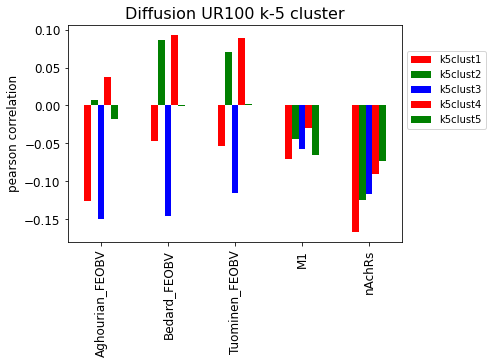

In [23]:
ax = DUR_k5clustcorr_df.plot(kind='bar', color=['r','g', 'b'], fontsize=12) 
for p in ax.patches:
    ax.set_ylabel('pearson correlation',fontsize=12)
    ax.set_title('Diffusion UR100 k-5 cluster', fontsize=16)
    ax.legend(loc='center left', bbox_to_anchor=(1.0, 0.7))
ax.figure.savefig(fig_path+'Diff_UR100_k-5cluster_comp.png', dpi=300)

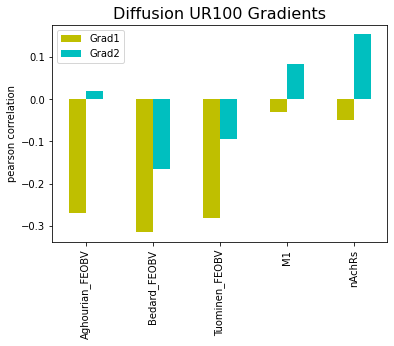

In [24]:
ax = DUR_gradcorr_df.plot(kind='bar', color=['y', 'c',]) 
x_offset = -0.5
y_offset = 0.5
for p in ax.patches:
    b = p.get_bbox()
    val = "{:+.2f}".format(b.y1 + b.y0)        
    ax.annotate(val, ((b.x0 + b.x1)/2 + x_offset, b.y1 + y_offset))
    ax.set_ylabel('pearson correlation')
    ax.set_title('Diffusion UR100 Gradients', fontsize=16)
ax.figure.savefig(fig_path+'Diff_UR100_Gradients_comp.png', dpi=300)

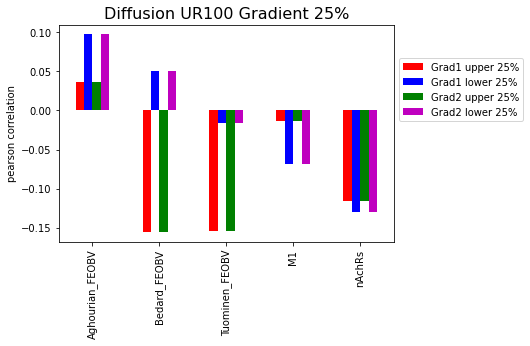

In [25]:
ax = DUR_grad25corr_df.plot(kind='bar', color=['r','b', 'g', 'm']) 
x_offset = -1
y_offset = 1
for p in ax.patches:
    b = p.get_bbox()
    val = "{:+.2f}".format(b.y1 + b.y0)        
    ax.annotate(val, ((b.x0 + b.x1)/2 + x_offset, b.y1 + y_offset))
    ax.legend(loc='center left', bbox_to_anchor=(1.0, 0.7))
    ax.set_ylabel('pearson correlation')
    ax.set_title('Diffusion UR100 Gradient 25%', fontsize=16)
ax.figure.savefig(fig_path+'Diff_UR100_Gradients_25%_comp.png', dpi=300)

### Spatial Null models

In [32]:
alex_aghourian_rotated = nulls.alexander_bloch(Aghourian_FEOBV_fsa, atlas='fsaverage', density='10k', n_perm=100, seed=1234)
alex_bedard_rotated = nulls.alexander_bloch(Bedard_FEOBV_fsa, atlas='fsaverage', density='10k', n_perm=100, seed=1234)
alex_tuominen_rotated = nulls.alexander_bloch(Tuominen_FEOBV_fsa, atlas='fsaverage', density='10k', n_perm=100, seed=1234)
alex_M1_rotated = nulls.alexander_bloch(M1_fsa, atlas='fsaverage', density='10k', n_perm=100, seed=1234)
alex_nAchRs_rotated = nulls.alexander_bloch(nAchRs_fsa, atlas='fsaverage', density='10k', n_perm=100, seed=1234)

In [33]:
alex_tr_aghourian_rotated = nulls.alexander_bloch(Tr_Aghourian_FEOBV_fsa, atlas='fsaverage', density='10k', n_perm=100, seed=1234)
alex_tr_bedard_rotated = nulls.alexander_bloch(Tr_Bedard_FEOBV_fsa, atlas='fsaverage', density='10k', n_perm=100, seed=1234)
alex_tr_tuominen_rotated = nulls.alexander_bloch(Tr_Tuominen_FEOBV_fsa, atlas='fsaverage', density='10k', n_perm=100, seed=1234)
alex_tr_M1_rotated = nulls.alexander_bloch(Tr_M1_fsa, atlas='fsaverage', density='10k', n_perm=100, seed=1234)
alex_tr_nAchRs_rotated = nulls.alexander_bloch(Tr_nAchRs_fsa, atlas='fsaverage', density='10k', n_perm=100, seed=1234)

In [28]:
# Compare with Aghourian_FEOBV
Aghourian_k5clust1corr, Aghourian_k5clust1pval = stats.compare_images(Aghourian_FEOBV_fsa, k5clust1, nulls=alex_aghourian_rotated)
Aghourian_k5clust2corr, Aghourian_k5clust2pval = stats.compare_images(Aghourian_FEOBV_fsa, k5clust2, nulls=alex_aghourian_rotated)
Aghourian_k5clust3corr, Aghourian_k5clust3pval = stats.compare_images(Aghourian_FEOBV_fsa, k5clust3, nulls=alex_aghourian_rotated)
Aghourian_k5clust4corr, Aghourian_k5clust4pval = stats.compare_images(Aghourian_FEOBV_fsa, k5clust4, nulls=alex_aghourian_rotated)
Aghourian_k5clust5corr, Aghourian_k5clust5pval = stats.compare_images(Aghourian_FEOBV_fsa, k5clust5, nulls=alex_aghourian_rotated)

Aghourian_G1corr, Aghourian_G1pval = stats.compare_images(Aghourian_FEOBV_fsa, grad1, nulls=alex_aghourian_rotated)
Aghourian_G2corr, Aghourian_G2pval = stats.compare_images(Aghourian_FEOBV_fsa, grad2, nulls=alex_aghourian_rotated)

Aghourian_G1upper25corr, Aghourian_G1upper25pval = stats.compare_images(Tr_Aghourian_FEOBV_fsa, grad1_upper25, nulls=alex_tr_aghourian_rotated)
Aghourian_G1lower25corr, Aghourian_G1lower25pval = stats.compare_images(Tr_Aghourian_FEOBV_fsa, grad1_lower25, nulls=alex_tr_aghourian_rotated)
Aghourian_G2upper25corr, Aghourian_G2upper25pval = stats.compare_images(Tr_Aghourian_FEOBV_fsa, grad2_upper25, nulls=alex_tr_aghourian_rotated)
Aghourian_G2lower25corr, Aghourian_G2lower25pval = stats.compare_images(Tr_Aghourian_FEOBV_fsa, grad2_lower25, nulls=alex_tr_aghourian_rotated)

In [30]:
# Compare with Bedard_FEOBV
Bedard_k5clust1corr, Bedard_k5clust1pval = stats.compare_images(Bedard_FEOBV_fsa, k5clust1, nulls=alex_bedard_rotated)
Bedard_k5clust2corr, Bedard_k5clust2pval = stats.compare_images(Bedard_FEOBV_fsa, k5clust2, nulls=alex_bedard_rotated)
Bedard_k5clust3corr, Bedard_k5clust3pval = stats.compare_images(Bedard_FEOBV_fsa, k5clust3, nulls=alex_bedard_rotated)
Bedard_k5clust4corr, Bedard_k5clust4pval = stats.compare_images(Bedard_FEOBV_fsa, k5clust4, nulls=alex_bedard_rotated)
Bedard_k5clust5corr, Bedard_k5clust5pval = stats.compare_images(Bedard_FEOBV_fsa, k5clust5, nulls=alex_bedard_rotated)

Bedard_G1corr, Bedard_G1pval = stats.compare_images(Bedard_FEOBV_fsa, grad1, nulls=alex_bedard_rotated)
Bedard_G2corr, Bedard_G2pval = stats.compare_images(Bedard_FEOBV_fsa, grad2, nulls=alex_bedard_rotated)

Bedard_G1upper25corr, Bedard_G1upper25pval = stats.compare_images(Tr_Bedard_FEOBV_fsa, grad1_upper25, nulls=alex_tr_bedard_rotated)
Bedard_G1lower25corr, Bedard_G1lower25pval = stats.compare_images(Tr_Bedard_FEOBV_fsa, grad1_lower25, nulls=alex_tr_bedard_rotated)
Bedard_G2upper25corr, Bedard_G2upper25pval = stats.compare_images(Tr_Bedard_FEOBV_fsa, grad2_upper25, nulls=alex_tr_bedard_rotated)
Bedard_G2lower25corr, Bedard_G2lower25pval = stats.compare_images(Tr_Bedard_FEOBV_fsa, grad2_lower25, nulls=alex_tr_bedard_rotated)

In [34]:
# Compare with Tuominen_FEOBV
Tuominen_k5clust1corr, Tuominen_k5clust1pval = stats.compare_images(Tuominen_FEOBV_fsa, k5clust1, nulls=alex_tuominen_rotated)
Tuominen_k5clust2corr, Tuominen_k5clust2pval = stats.compare_images(Tuominen_FEOBV_fsa, k5clust2, nulls=alex_tuominen_rotated)
Tuominen_k5clust3corr, Tuominen_k5clust3pval = stats.compare_images(Tuominen_FEOBV_fsa, k5clust3, nulls=alex_tuominen_rotated)
Tuominen_k5clust4corr, Tuominen_k5clust4pval = stats.compare_images(Tuominen_FEOBV_fsa, k5clust4, nulls=alex_tuominen_rotated)
Tuominen_k5clust5corr, Tuominen_k5clust5pval = stats.compare_images(Tuominen_FEOBV_fsa, k5clust5, nulls=alex_tuominen_rotated)

Tuominen_G1corr, Tuominen_G1pval = stats.compare_images(Tuominen_FEOBV_fsa, grad1, nulls=alex_tuominen_rotated)
Tuominen_G2corr, Tuominen_G2pval = stats.compare_images(Tuominen_FEOBV_fsa, grad2, nulls=alex_tuominen_rotated)

Tuominen_G1upper25corr, Tuominen_G1upper25pval = stats.compare_images(Tr_Tuominen_FEOBV_fsa, grad1_upper25, nulls=alex_tr_tuominen_rotated)
Tuominen_G1lower25corr, Tuominen_G1lower25pval = stats.compare_images(Tr_Tuominen_FEOBV_fsa, grad1_lower25, nulls=alex_tr_tuominen_rotated)
Tuominen_G2upper25corr, Tuominen_G2upper25pval = stats.compare_images(Tr_Tuominen_FEOBV_fsa, grad2_upper25, nulls=alex_tr_tuominen_rotated)
Tuominen_G2lower25corr, Tuominen_G2lower25pval = stats.compare_images(Tr_Tuominen_FEOBV_fsa, grad2_lower25, nulls=alex_tr_tuominen_rotated)

In [35]:
# Compare with M1
M1_k5clust1corr, M1_k5clust1pval = stats.compare_images(M1_fsa, k5clust1, nulls=alex_M1_rotated)
M1_k5clust2corr, M1_k5clust2pval = stats.compare_images(M1_fsa, k5clust2, nulls=alex_M1_rotated)
M1_k5clust3corr, M1_k5clust3pval = stats.compare_images(M1_fsa, k5clust3, nulls=alex_M1_rotated)
M1_k5clust4corr, M1_k5clust4pval = stats.compare_images(M1_fsa, k5clust4, nulls=alex_M1_rotated)
M1_k5clust5corr, M1_k5clust5pval = stats.compare_images(M1_fsa, k5clust5, nulls=alex_M1_rotated)

M1_G1corr, M1_G1pval = stats.compare_images(M1_fsa, grad1, nulls=alex_M1_rotated)
M1_G2corr, M1_G2pval = stats.compare_images(M1_fsa, grad2, nulls=alex_M1_rotated)

M1_G1upper25corr, M1_G1upper25pval = stats.compare_images(Tr_M1_fsa, grad1_upper25, nulls=alex_tr_M1_rotated)
M1_G1lower25corr, M1_G1lower25pval = stats.compare_images(Tr_M1_fsa, grad1_lower25, nulls=alex_tr_M1_rotated)
M1_G2upper25corr, M1_G2upper25pval = stats.compare_images(Tr_M1_fsa, grad2_upper25, nulls=alex_tr_M1_rotated)
M1_G2lower25corr, M1_G2lower25pval = stats.compare_images(Tr_M1_fsa, grad2_lower25, nulls=alex_tr_M1_rotated)

In [36]:
# Compare with nAchRs
nAchRs_k5clust1corr, nAchRs_k5clust1pval = stats.compare_images(nAchRs_fsa, k5clust1, nulls=alex_nAchRs_rotated)
nAchRs_k5clust2corr, nAchRs_k5clust2pval = stats.compare_images(nAchRs_fsa, k5clust2, nulls=alex_nAchRs_rotated)
nAchRs_k5clust3corr, nAchRs_k5clust3pval = stats.compare_images(nAchRs_fsa, k5clust3, nulls=alex_nAchRs_rotated)
nAchRs_k5clust4corr, nAchRs_k5clust4pval = stats.compare_images(nAchRs_fsa, k5clust4, nulls=alex_nAchRs_rotated)
nAchRs_k5clust5corr, nAchRs_k5clust5pval = stats.compare_images(nAchRs_fsa, k5clust5, nulls=alex_nAchRs_rotated)

nAchRs_G1corr, nAchRs_G1pval = stats.compare_images(nAchRs_fsa, grad1, nulls=alex_nAchRs_rotated)
nAchRs_G2corr, nAchRs_G2pval = stats.compare_images(nAchRs_fsa, grad2, nulls=alex_nAchRs_rotated)

nAchRs_G1upper25corr, nAchRs_G1upper25pval = stats.compare_images(Tr_nAchRs_fsa, grad1_upper25, nulls=alex_tr_nAchRs_rotated)
nAchRs_G1lower25corr, nAchRs_G1lower25pval = stats.compare_images(Tr_nAchRs_fsa, grad1_lower25, nulls=alex_tr_nAchRs_rotated)
nAchRs_G2upper25corr, nAchRs_G2upper25pval = stats.compare_images(Tr_nAchRs_fsa, grad2_upper25, nulls=alex_tr_nAchRs_rotated)
nAchRs_G2lower25corr, nAchRs_G2lower25pval = stats.compare_images(Tr_nAchRs_fsa, grad2_lower25, nulls=alex_tr_nAchRs_rotated)

In [37]:
DUR_null_k5clust1corr = [Aghourian_k5clust1corr, Bedard_k5clust1corr, Tuominen_k5clust1corr, M1_k5clust1corr, nAchRs_k5clust1corr]
DUR_null_k5clust2corr = [Aghourian_k5clust2corr, Bedard_k5clust2corr, Tuominen_k5clust2corr, M1_k5clust2corr, nAchRs_k5clust2corr]
DUR_null_k5clust3corr = [Aghourian_k5clust3corr, Bedard_k5clust3corr, Tuominen_k5clust3corr, M1_k5clust3corr, nAchRs_k5clust3corr]
DUR_null_k5clust4corr = [Aghourian_k5clust4corr, Bedard_k5clust4corr, Tuominen_k5clust4corr, M1_k5clust4corr, nAchRs_k5clust4corr]
DUR_null_k5clust5corr = [Aghourian_k5clust5corr, Bedard_k5clust5corr, Tuominen_k5clust5corr, M1_k5clust5corr, nAchRs_k5clust5corr]

DUR_null_grad1_corr = [Aghourian_G1corr, Bedard_G1corr, Tuominen_G1corr, M1_G1corr, nAchRs_G1corr]
DUR_null_grad2_corr = [Aghourian_G2corr, Bedard_G2corr, Tuominen_G2corr, M1_G2corr, nAchRs_G2corr]

DUR_null_grad1_upper25_corr = [Aghourian_G1upper25corr, Bedard_G1upper25corr, Tuominen_G1upper25corr, M1_G1upper25corr, nAchRs_G1upper25corr]
DUR_null_grad1_lower25_corr = [Aghourian_G1lower25corr, Bedard_G1lower25corr, Tuominen_G1lower25corr, M1_G1lower25corr, nAchRs_G1lower25corr]
DUR_null_grad2_upper25_corr = [Aghourian_G2upper25corr, Bedard_G2upper25corr, Tuominen_G2upper25corr, M1_G2upper25corr, nAchRs_G2upper25corr]
DUR_null_grad2_lower25_corr = [Aghourian_G2lower25corr, Bedard_G2lower25corr, Tuominen_G2lower25corr, M1_G2lower25corr, nAchRs_G2lower25corr]

In [38]:
DUR_null_k5clust1pval = [Aghourian_k5clust1pval, Bedard_k5clust1pval, Tuominen_k5clust1pval, M1_k5clust1pval, nAchRs_k5clust1pval]
DUR_null_k5clust2pval = [Aghourian_k5clust2pval, Bedard_k5clust2pval, Tuominen_k5clust2pval, M1_k5clust2pval, nAchRs_k5clust2pval]
DUR_null_k5clust3pval = [Aghourian_k5clust3pval, Bedard_k5clust3pval, Tuominen_k5clust3pval, M1_k5clust3pval, nAchRs_k5clust3pval]
DUR_null_k5clust4pval = [Aghourian_k5clust4pval, Bedard_k5clust4pval, Tuominen_k5clust4pval, M1_k5clust4pval, nAchRs_k5clust4pval]
DUR_null_k5clust5pval = [Aghourian_k5clust5pval, Bedard_k5clust5pval, Tuominen_k5clust5pval, M1_k5clust5pval, nAchRs_k5clust5pval]

DUR_null_grad1_pval = [Aghourian_G1pval, Bedard_G1pval, Tuominen_G1pval, M1_G1pval, nAchRs_G1pval]
DUR_null_grad2_pval = [Aghourian_G2pval, Bedard_G2pval, Tuominen_G2pval, M1_G2pval, nAchRs_G2pval]

DUR_null_grad1_upper25_pval = [Aghourian_G1upper25pval, Bedard_G1upper25pval, Tuominen_G1upper25pval, M1_G1upper25pval, nAchRs_G1upper25pval]
DUR_null_grad1_lower25_pval = [Aghourian_G1lower25pval, Bedard_G1lower25pval, Tuominen_G1lower25pval, M1_G1lower25pval, nAchRs_G1lower25pval]
DUR_null_grad2_upper25_pval = [Aghourian_G2upper25pval, Bedard_G2upper25pval, Tuominen_G2upper25pval, M1_G2upper25pval, nAchRs_G2upper25pval]
DUR_null_grad2_lower25_pval = [Aghourian_G2lower25pval, Bedard_G2lower25pval, Tuominen_G2lower25pval, M1_G2lower25pval, nAchRs_G2lower25pval]

In [39]:
DUR_null_k5clustcorr_df = pd.DataFrame({'k5clust1corr':DUR_null_k5clust1corr, 'k5clust1pval':DUR_null_k5clust1pval, 'k5clust2corr':DUR_null_k5clust2corr, 'k5clust2pval':DUR_null_k5clust2pval,'k5clust3corr':DUR_null_k5clust3corr, 'k5clust3pval':DUR_null_k5clust3pval, 'k5clust4corr':DUR_null_k5clust4corr, 'k5clust4pval':DUR_null_k5clust4pval, 'k5clust5corr':DUR_null_k5clust5corr, 'k5clust5pval':DUR_null_k5clust5pval},index=['Aghourian_FEOBV', 'Bedard_FEOBV', 'Tuominen_FEOBV', 'M1', 'nAchRs'])
DUR_null_gradcorr_df = pd.DataFrame({'Grad1corr':DUR_null_grad1_corr, 'Grad1pval':DUR_null_grad1_pval, 'Grad2corr':DUR_null_grad2_corr, 'Grad2pval':DUR_null_grad2_pval},index=['Aghourian_FEOBV', 'Bedard_FEOBV', 'Tuominen_FEOBV', 'M1', 'nAchRs'])
DUR_null_grad25corr_df = pd.DataFrame({'Grad1 upper 25% corr':DUR_null_grad1_upper25_corr, 'Grad1 upper 25% pval':DUR_null_grad1_upper25_pval, 'Grad1 lower 25% corr':DUR_null_grad1_lower25_corr, 'Grad1 lower 25% pval':DUR_null_grad1_lower25_pval, 'Grad2 upper 25% corr':DUR_null_grad2_upper25_corr, 'Grad2 upper 25% pval':DUR_null_grad2_upper25_pval, 'Grad2 lower 25% corr':DUR_null_grad2_lower25_corr, 'Grad2 lower 25% pval':DUR_null_grad2_lower25_pval},index=['Aghourian_FEOBV', 'Bedard_FEOBV', 'Tuominen_FEOBV', 'M1', 'nAchRs'])

In [68]:
pd.DataFrame(DUR_null_k5clustcorr_df).to_csv(results_path + 'Diff_UR100_null_k5clust_comp.csv')
pd.DataFrame(DUR_null_gradcorr_df).to_csv(results_path + 'Diff_UR100_null_Grad_comp.csv')
pd.DataFrame(DUR_null_grad25corr_df).to_csv(results_path + 'Diff_UR100_null_Grad25_comp.csv')

In [40]:
DUR_null_k5clustcorr_df

,k5clust1corr,k5clust1pval,k5clust2corr,k5clust2pval,k5clust3corr,k5clust3pval,k5clust4corr,k5clust4pval,k5clust5corr,k5clust5pval
Aghourian_FEOBV,-0.125537,0.326733,0.006544,0.950495,-0.149628,0.297030,0.037134,0.712871,-0.017623,0.881188
Bedard_FEOBV,-0.046835,0.663366,0.086752,0.386139,-0.146176,0.267327,0.093408,0.326733,-0.001230,0.990099
Tuominen_FEOBV,-0.053197,0.653465,0.069922,0.435644,-0.116227,0.297030,0.088526,0.306931,0.001823,0.940594
M1,-0.070688,0.504950,-0.044061,0.564356,-0.057074,0.673267,-0.029875,0.732673,-0.064932,0.386139
nAchRs,-0.167429,0.049505,-0.124260,0.049505,-0.116370,0.158416,-0.090710,0.168317,-0.073823,0.297030


In [41]:
DUR_null_gradcorr_df

,Grad1corr,Grad1pval,Grad2corr,Grad2pval
Aghourian_FEOBV,-0.269554,0.079208,0.019335,0.920792
Bedard_FEOBV,-0.314786,0.009901,-0.165886,0.247525
Tuominen_FEOBV,-0.282084,0.009901,-0.094706,0.514851
M1,-0.030085,0.831683,0.082281,0.564356
nAchRs,-0.050232,0.495050,0.152217,0.079208


In [42]:
DUR_null_grad25corr_df

,Grad1 upper 25% corr,Grad1 upper 25% pval,Grad1 lower 25% corr,Grad1 lower 25% pval,Grad2 upper 25% corr,Grad2 upper 25% pval,Grad2 lower 25% corr,Grad2 lower 25% pval
Aghourian_FEOBV,0.036076,0.762376,0.097287,0.415842,0.036076,0.762376,0.097287,0.415842
Bedard_FEOBV,-0.155864,0.148515,0.050116,0.574257,-0.155864,0.148515,0.050116,0.574257
Tuominen_FEOBV,-0.154634,0.138614,-0.015861,0.841584,-0.154634,0.138614,-0.015861,0.841584
M1,-0.013720,0.930693,-0.068362,0.366337,-0.013720,0.930693,-0.068362,0.366337
nAchRs,-0.116003,0.495050,-0.129444,0.267327,-0.116003,0.495050,-0.129444,0.267327


In [43]:
pd.DataFrame(DUR_null_k5clustcorr_df).to_csv(results_path + 'Diff_UR100_null_k3clust_comp.csv')
pd.DataFrame(DUR_null_gradcorr_df).to_csv(results_path + 'Diff_UR100_null_Grad_comp.csv')
pd.DataFrame(DUR_null_grad25corr_df).to_csv(results_path + 'Diff_UR100_null_Grad25_comp.csv')

### Compare with Diff 7Tsubj(7TDWI) data

In [44]:
# Data path
D7Ts_results_path = "/home/ROBARTS/schakraborty/graham/sudesnacPJ/21_Codes/HumanBF-Parcellation/results/Diff_7Tsubj7TDWI/"

In [45]:
# Cluster data
D7T_k5clust1_L = images.load_gifti(D7Ts_results_path+'Diff_7Tsubj7TDWI_k-5_cluster-1_L_fsa-10k.gii')
D7T_k5clust1_R = images.load_gifti(D7Ts_results_path+'Diff_7Tsubj7TDWI_k-5_cluster-1_R_fsa-10k.gii')
k5clust1 = (D7T_k5clust1_L, D7T_k5clust1_R)
D7T_k5clust2_L = images.load_gifti(D7Ts_results_path+'Diff_7Tsubj7TDWI_k-5_cluster-2_L_fsa-10k.gii')
D7T_k5clust2_R = images.load_gifti(D7Ts_results_path+'Diff_7Tsubj7TDWI_k-5_cluster-2_R_fsa-10k.gii')
k5clust2 = (D7T_k5clust2_L, D7T_k5clust2_R)
D7T_k5clust3_L = images.load_gifti(D7Ts_results_path+'Diff_7Tsubj7TDWI_k-5_cluster-3_L_fsa-10k.gii')
D7T_k5clust3_R = images.load_gifti(D7Ts_results_path+'Diff_7Tsubj7TDWI_k-5_cluster-3_R_fsa-10k.gii')
k5clust3 = (D7T_k5clust3_L, D7T_k5clust3_R)
D7T_k5clust4_L = images.load_gifti(D7Ts_results_path+'Diff_7Tsubj7TDWI_k-5_cluster-4_L_fsa-10k.gii')
D7T_k5clust4_R = images.load_gifti(D7Ts_results_path+'Diff_7Tsubj7TDWI_k-5_cluster-4_R_fsa-10k.gii')
k5clust4 = (D7T_k5clust4_L, D7T_k5clust4_R)
D7T_k5clust5_L = images.load_gifti(D7Ts_results_path+'Diff_7Tsubj7TDWI_k-5_cluster-5_L_fsa-10k.gii')
D7T_k5clust5_R = images.load_gifti(D7Ts_results_path+'Diff_7Tsubj7TDWI_k-5_cluster-5_R_fsa-10k.gii')
k5clust5 = (D7T_k5clust5_L, D7T_k5clust5_R)

# Gradient Data
D7T_grad1_L = images.load_gifti(D7Ts_results_path+'Diff_7Tsubj7TDWI_Gradient-1_weighted_L_fsa-10k.gii')
D7T_grad1_R = images.load_gifti(D7Ts_results_path+'Diff_7Tsubj7TDWI_Gradient-1_weighted_R_fsa-10k.gii')
grad1 = (D7T_grad1_L, D7T_grad1_R)
D7T_grad2_L = images.load_gifti(D7Ts_results_path+'Diff_7Tsubj7TDWI_Gradient-2_weighted_L_fsa-10k.gii')
D7T_grad2_R = images.load_gifti(D7Ts_results_path+'Diff_7Tsubj7TDWI_Gradient-2_weighted_R_fsa-10k.gii')
grad2 = (D7T_grad2_L, D7T_grad2_R)

# Gradient 25% data
grad1_upper25_L = images.load_gifti(D7Ts_results_path+'Diff_7Tsubj7TDWI_Gradient-1_Upper25%_L_fsa-10k.gii')
grad1_upper25_R = images.load_gifti(D7Ts_results_path+'Diff_7Tsubj7TDWI_Gradient-1_Upper25%_R_fsa-10k.gii')
grad1_lower25_L = images.load_gifti(D7Ts_results_path+'Diff_7Tsubj7TDWI_Gradient-1_Lower25%_L_fsa-10k.gii')
grad1_lower25_R = images.load_gifti(D7Ts_results_path+'Diff_7Tsubj7TDWI_Gradient-1_Lower25%_R_fsa-10k.gii')
grad1_upper25 = (grad1_upper25_L, grad1_upper25_R)
grad1_lower25 = (grad1_lower25_L, grad1_lower25_R)
grad2_upper25_L = images.load_gifti(D7Ts_results_path+'Diff_7Tsubj7TDWI_Gradient-1_Upper25%_L_fsa-10k.gii')
grad2_upper25_R = images.load_gifti(D7Ts_results_path+'Diff_7Tsubj7TDWI_Gradient-1_Upper25%_R_fsa-10k.gii')
grad2_lower25_L = images.load_gifti(D7Ts_results_path+'Diff_7Tsubj7TDWI_Gradient-1_Lower25%_L_fsa-10k.gii')
grad2_lower25_R = images.load_gifti(D7Ts_results_path+'Diff_7Tsubj7TDWI_Gradient-1_Lower25%_R_fsa-10k.gii')
grad2_upper25 = (grad2_upper25_L, grad2_upper25_R)
grad2_lower25 = (grad2_lower25_L, grad2_lower25_R)

In [46]:
# Compare with Aghourian_FEOBV
Aghourian_FEOBVk5clust1corr = stats.compare_images(k5clust1, Aghourian_FEOBV_fsa, metric='pearsonr')
Aghourian_FEOBVk5clust2corr = stats.compare_images(k5clust2, Aghourian_FEOBV_fsa, metric='pearsonr')
Aghourian_FEOBVk5clust3corr = stats.compare_images(k5clust3, Aghourian_FEOBV_fsa, metric='pearsonr')
Aghourian_FEOBVk5clust4corr = stats.compare_images(k5clust4, Aghourian_FEOBV_fsa, metric='pearsonr')
Aghourian_FEOBVk5clust5corr = stats.compare_images(k5clust5, Aghourian_FEOBV_fsa, metric='pearsonr')

Aghourian_FEOBVG1corr = stats.compare_images(grad1, Aghourian_FEOBV_fsa, metric='pearsonr')
Aghourian_FEOBVG2corr = stats.compare_images(grad2, Aghourian_FEOBV_fsa, metric='pearsonr')

Aghourian_FEOBVG1upper25corr = stats.compare_images(grad1_upper25, Tr_Aghourian_FEOBV_fsa, metric='pearsonr')
Aghourian_FEOBVG1lower25corr = stats.compare_images(grad1_lower25, Tr_Aghourian_FEOBV_fsa, metric='pearsonr')
Aghourian_FEOBVG2upper25corr = stats.compare_images(grad2_upper25, Tr_Aghourian_FEOBV_fsa, metric='pearsonr')
Aghourian_FEOBVG2lower25corr = stats.compare_images(grad2_lower25, Tr_Aghourian_FEOBV_fsa, metric='pearsonr')

In [47]:
# Compare with Bedard_FEOBV
Bedard_FEOBVk5clust1corr = stats.compare_images(k5clust1, Bedard_FEOBV_fsa, metric='pearsonr')
Bedard_FEOBVk5clust2corr = stats.compare_images(k5clust2, Bedard_FEOBV_fsa, metric='pearsonr')
Bedard_FEOBVk5clust3corr = stats.compare_images(k5clust3, Bedard_FEOBV_fsa, metric='pearsonr')
Bedard_FEOBVk5clust4corr = stats.compare_images(k5clust4, Bedard_FEOBV_fsa, metric='pearsonr')
Bedard_FEOBVk5clust5corr = stats.compare_images(k5clust5, Bedard_FEOBV_fsa, metric='pearsonr')

Bedard_FEOBVG1corr = stats.compare_images(grad1, Bedard_FEOBV_fsa, metric='pearsonr')
Bedard_FEOBVG2corr = stats.compare_images(grad2, Bedard_FEOBV_fsa, metric='pearsonr')

Bedard_FEOBVG1upper25corr = stats.compare_images(grad1_upper25, Tr_Bedard_FEOBV_fsa, metric='pearsonr')
Bedard_FEOBVG1lower25corr = stats.compare_images(grad1_lower25, Tr_Bedard_FEOBV_fsa, metric='pearsonr')
Bedard_FEOBVG2upper25corr = stats.compare_images(grad2_upper25, Tr_Bedard_FEOBV_fsa, metric='pearsonr')
Bedard_FEOBVG2lower25corr = stats.compare_images(grad2_lower25, Tr_Bedard_FEOBV_fsa, metric='pearsonr')

In [48]:
# Compare with Tuominen_FEOBV
Tuominen_FEOBVk5clust1corr = stats.compare_images(k5clust1, Tuominen_FEOBV_fsa, metric='pearsonr')
Tuominen_FEOBVk5clust2corr = stats.compare_images(k5clust2, Tuominen_FEOBV_fsa, metric='pearsonr')
Tuominen_FEOBVk5clust3corr = stats.compare_images(k5clust3, Tuominen_FEOBV_fsa, metric='pearsonr')
Tuominen_FEOBVk5clust4corr = stats.compare_images(k5clust4, Tuominen_FEOBV_fsa, metric='pearsonr')
Tuominen_FEOBVk5clust5corr = stats.compare_images(k5clust5, Tuominen_FEOBV_fsa, metric='pearsonr')

Tuominen_FEOBVG1corr = stats.compare_images(grad1, Tuominen_FEOBV_fsa, metric='pearsonr')
Tuominen_FEOBVG2corr = stats.compare_images(grad2, Tuominen_FEOBV_fsa, metric='pearsonr')

Tuominen_FEOBVG1upper25corr = stats.compare_images(grad1_upper25, Tr_Tuominen_FEOBV_fsa, metric='pearsonr')
Tuominen_FEOBVG1lower25corr = stats.compare_images(grad1_lower25, Tr_Tuominen_FEOBV_fsa, metric='pearsonr')
Tuominen_FEOBVG2upper25corr = stats.compare_images(grad2_upper25, Tr_Tuominen_FEOBV_fsa, metric='pearsonr')
Tuominen_FEOBVG2lower25corr = stats.compare_images(grad2_lower25, Tr_Tuominen_FEOBV_fsa, metric='pearsonr')

In [49]:
# Compare with M1
M1k5clust1corr = stats.compare_images(k5clust1, M1_fsa, metric='pearsonr')
M1k5clust2corr = stats.compare_images(k5clust2, M1_fsa, metric='pearsonr')
M1k5clust3corr = stats.compare_images(k5clust3, M1_fsa, metric='pearsonr')
M1k5clust4corr = stats.compare_images(k5clust4, M1_fsa, metric='pearsonr')
M1k5clust5corr = stats.compare_images(k5clust5, M1_fsa, metric='pearsonr')

M1G1corr = stats.compare_images(grad1, M1_fsa, metric='pearsonr')
M1G2corr = stats.compare_images(grad2, M1_fsa, metric='pearsonr')

M1G1upper25corr = stats.compare_images(grad1_upper25, Tr_M1_fsa, metric='pearsonr')
M1G1lower25corr = stats.compare_images(grad1_lower25, Tr_M1_fsa, metric='pearsonr')
M1G2upper25corr = stats.compare_images(grad2_upper25, Tr_M1_fsa, metric='pearsonr')
M1G2lower25corr = stats.compare_images(grad2_lower25, Tr_M1_fsa, metric='pearsonr')

In [50]:
# Compare with nAchRs
nAchRsk5clust1corr = stats.compare_images(k5clust1, nAchRs_fsa, metric='pearsonr')
nAchRsk5clust2corr = stats.compare_images(k5clust2, nAchRs_fsa, metric='pearsonr')
nAchRsk5clust3corr = stats.compare_images(k5clust3, nAchRs_fsa, metric='pearsonr')
nAchRsk5clust4corr = stats.compare_images(k5clust4, nAchRs_fsa, metric='pearsonr')
nAchRsk5clust5corr = stats.compare_images(k5clust5, nAchRs_fsa, metric='pearsonr')

nAchRsG1corr = stats.compare_images(grad1, nAchRs_fsa, metric='pearsonr')
nAchRsG2corr = stats.compare_images(grad2, nAchRs_fsa, metric='pearsonr')

nAchRsG1upper25corr = stats.compare_images(grad1_upper25, Tr_nAchRs_fsa, metric='pearsonr')
nAchRsG1lower25corr = stats.compare_images(grad1_lower25, Tr_nAchRs_fsa, metric='pearsonr')
nAchRsG2upper25corr = stats.compare_images(grad2_upper25, Tr_nAchRs_fsa, metric='pearsonr')
nAchRsG2lower25corr = stats.compare_images(grad2_lower25, Tr_nAchRs_fsa, metric='pearsonr')

In [51]:
D7T_k5clust1corr = [Aghourian_FEOBVk5clust1corr, Bedard_FEOBVk5clust1corr, Tuominen_FEOBVk5clust1corr, M1k5clust1corr, nAchRsk5clust1corr]
D7T_k5clust2corr = [Aghourian_FEOBVk5clust2corr, Bedard_FEOBVk5clust2corr, Tuominen_FEOBVk5clust2corr, M1k5clust2corr, nAchRsk5clust2corr]
D7T_k5clust3corr = [Aghourian_FEOBVk5clust3corr, Bedard_FEOBVk5clust3corr, Tuominen_FEOBVk5clust3corr, M1k5clust3corr, nAchRsk5clust3corr]
D7T_k5clust4corr = [Aghourian_FEOBVk5clust4corr, Bedard_FEOBVk5clust4corr, Tuominen_FEOBVk5clust4corr, M1k5clust4corr, nAchRsk5clust4corr]
D7T_k5clust5corr = [Aghourian_FEOBVk5clust5corr, Bedard_FEOBVk5clust5corr, Tuominen_FEOBVk5clust5corr, M1k5clust5corr, nAchRsk5clust5corr]

D7T_grad1_corr = [Aghourian_FEOBVG1corr, Bedard_FEOBVG1corr, Tuominen_FEOBVG1corr, M1G1corr, nAchRsG1corr]
D7T_grad2_corr = [Aghourian_FEOBVG2corr, Bedard_FEOBVG2corr, Tuominen_FEOBVG2corr, M1G2corr, nAchRsG2corr]

D7T_grad1_upper25_corr = [Aghourian_FEOBVG1upper25corr, Bedard_FEOBVG1upper25corr, Tuominen_FEOBVG1upper25corr, M1G1upper25corr, nAchRsG1upper25corr]
D7T_grad1_lower25_corr = [Aghourian_FEOBVG1lower25corr, Bedard_FEOBVG1lower25corr, Tuominen_FEOBVG1lower25corr, M1G1lower25corr, nAchRsG1lower25corr]
D7T_grad2_upper25_corr = [Aghourian_FEOBVG2upper25corr, Bedard_FEOBVG2upper25corr, Tuominen_FEOBVG2upper25corr, M1G2upper25corr, nAchRsG2upper25corr]
D7T_grad2_lower25_corr = [Aghourian_FEOBVG2lower25corr, Bedard_FEOBVG2lower25corr, Tuominen_FEOBVG2lower25corr, M1G2lower25corr, nAchRsG2lower25corr]

In [52]:
D7T_k5clustcorr_df = pd.DataFrame({'k5clust1':D7T_k5clust1corr,'k5clust2':D7T_k5clust2corr, 'k5clust3':D7T_k5clust3corr, 'k5clust4':D7T_k5clust4corr, 'k5clust5':D7T_k5clust5corr},index=['Aghourian_FEOBV', 'Bedard_FEOBV', 'Tuominen_FEOBV', 'M1', 'nAchRs'])
D7T_gradcorr_df = pd.DataFrame({'Grad1':D7T_grad1_corr,'Grad2':D7T_grad2_corr},index=['Aghourian_FEOBV', 'Bedard_FEOBV', 'Tuominen_FEOBV', 'M1', 'nAchRs'])
D7T_grad25corr_df = pd.DataFrame({'Grad1 upper 25%':D7T_grad1_upper25_corr, 'Grad1 lower 25%':D7T_grad1_lower25_corr, 'Grad2 upper 25%':D7T_grad2_upper25_corr, 'Grad2 lower 25%':D7T_grad2_lower25_corr},index=['Aghourian_FEOBV', 'Bedard_FEOBV', 'Tuominen_FEOBV', 'M1', 'nAchRs'])

In [53]:
pd.DataFrame(D7T_k5clustcorr_df).to_csv(results_path + 'Diff_7Tsubj7TDWI_k5clust_corr.csv')
pd.DataFrame(D7T_gradcorr_df).to_csv(results_path + 'Diff_7Tsubj7TDWI_Grad_corr.csv')
pd.DataFrame(D7T_grad25corr_df).to_csv(results_path + 'Diff_7Tsubj7TDWI_Grad25_corr.csv')

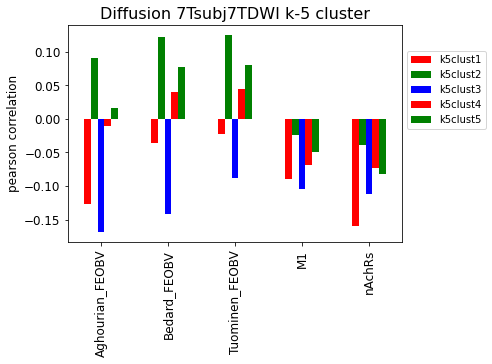

In [54]:
ax = D7T_k5clustcorr_df.plot(kind='bar', color=['r','g', 'b'], fontsize=12) 
for p in ax.patches:
    ax.set_ylabel('pearson correlation',fontsize=12)
    ax.set_title('Diffusion 7Tsubj7TDWI k-5 cluster', fontsize=16)
    ax.legend(loc='center left', bbox_to_anchor=(1.0, 0.7))
ax.figure.savefig(fig_path+'Diff_7Tsubj7TDWI_k-5cluster_comp.png', dpi=300)

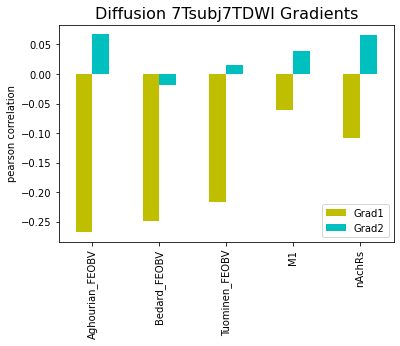

In [55]:
ax = D7T_gradcorr_df.plot(kind='bar', color=['y', 'c',]) 
x_offset = -0.5
y_offset = 0.5
for p in ax.patches:
    b = p.get_bbox()
    val = "{:+.2f}".format(b.y1 + b.y0)        
    ax.annotate(val, ((b.x0 + b.x1)/2 + x_offset, b.y1 + y_offset))
    ax.set_ylabel('pearson correlation')
    ax.set_title('Diffusion 7Tsubj7TDWI Gradients', fontsize=16)
ax.figure.savefig(fig_path+'Diff_7Tsubj7TDWI_Gradients_comp.png', dpi=300)

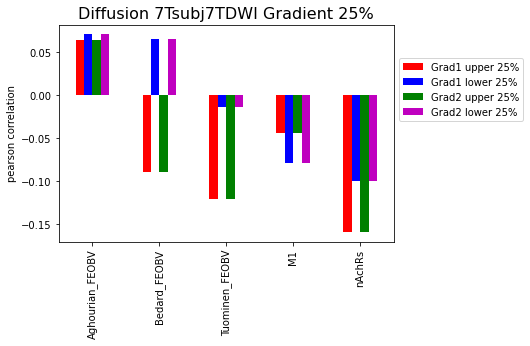

In [56]:
ax = D7T_grad25corr_df.plot(kind='bar', color=['r','b', 'g', 'm']) 
x_offset = -1
y_offset = 1
for p in ax.patches:
    b = p.get_bbox()
    val = "{:+.2f}".format(b.y1 + b.y0)        
    ax.annotate(val, ((b.x0 + b.x1)/2 + x_offset, b.y1 + y_offset))
    ax.legend(loc='center left', bbox_to_anchor=(1.0, 0.7))
    ax.set_ylabel('pearson correlation')
    ax.set_title('Diffusion 7Tsubj7TDWI Gradient 25%', fontsize=16)
ax.figure.savefig(fig_path+'Diff_7Tsubj7TDWI_Gradients_25%_comp.png', dpi=300)

### spatial null model for 7Tsubj 7TDWI data

In [57]:
# Compare with Aghourian_FEOBV
Aghourian_k5clust1corr, Aghourian_k5clust1pval = stats.compare_images(Aghourian_FEOBV_fsa, k5clust1, nulls=alex_aghourian_rotated)
Aghourian_k5clust2corr, Aghourian_k5clust2pval = stats.compare_images(Aghourian_FEOBV_fsa, k5clust2, nulls=alex_aghourian_rotated)
Aghourian_k5clust3corr, Aghourian_k5clust3pval = stats.compare_images(Aghourian_FEOBV_fsa, k5clust3, nulls=alex_aghourian_rotated)
Aghourian_k5clust4corr, Aghourian_k5clust4pval = stats.compare_images(Aghourian_FEOBV_fsa, k5clust4, nulls=alex_aghourian_rotated)
Aghourian_k5clust5corr, Aghourian_k5clust5pval = stats.compare_images(Aghourian_FEOBV_fsa, k5clust5, nulls=alex_aghourian_rotated)

Aghourian_G1corr, Aghourian_G1pval = stats.compare_images(Aghourian_FEOBV_fsa, grad1, nulls=alex_aghourian_rotated)
Aghourian_G2corr, Aghourian_G2pval = stats.compare_images(Aghourian_FEOBV_fsa, grad2, nulls=alex_aghourian_rotated)

Aghourian_G1upper25corr, Aghourian_G1upper25pval = stats.compare_images(Tr_Aghourian_FEOBV_fsa, grad1_upper25, nulls=alex_tr_aghourian_rotated)
Aghourian_G1lower25corr, Aghourian_G1lower25pval = stats.compare_images(Tr_Aghourian_FEOBV_fsa, grad1_lower25, nulls=alex_tr_aghourian_rotated)
Aghourian_G2upper25corr, Aghourian_G2upper25pval = stats.compare_images(Tr_Aghourian_FEOBV_fsa, grad2_upper25, nulls=alex_tr_aghourian_rotated)
Aghourian_G2lower25corr, Aghourian_G2lower25pval = stats.compare_images(Tr_Aghourian_FEOBV_fsa, grad2_lower25, nulls=alex_tr_aghourian_rotated)

In [58]:
# Compare with Bedard_FEOBV
Bedard_k5clust1corr, Bedard_k5clust1pval = stats.compare_images(Bedard_FEOBV_fsa, k5clust1, nulls=alex_bedard_rotated)
Bedard_k5clust2corr, Bedard_k5clust2pval = stats.compare_images(Bedard_FEOBV_fsa, k5clust2, nulls=alex_bedard_rotated)
Bedard_k5clust3corr, Bedard_k5clust3pval = stats.compare_images(Bedard_FEOBV_fsa, k5clust3, nulls=alex_bedard_rotated)
Bedard_k5clust4corr, Bedard_k5clust4pval = stats.compare_images(Bedard_FEOBV_fsa, k5clust4, nulls=alex_bedard_rotated)
Bedard_k5clust5corr, Bedard_k5clust5pval = stats.compare_images(Bedard_FEOBV_fsa, k5clust5, nulls=alex_bedard_rotated)

Bedard_G1corr, Bedard_G1pval = stats.compare_images(Bedard_FEOBV_fsa, grad1, nulls=alex_bedard_rotated)
Bedard_G2corr, Bedard_G2pval = stats.compare_images(Bedard_FEOBV_fsa, grad2, nulls=alex_bedard_rotated)

Bedard_G1upper25corr, Bedard_G1upper25pval = stats.compare_images(Tr_Bedard_FEOBV_fsa, grad1_upper25, nulls=alex_tr_bedard_rotated)
Bedard_G1lower25corr, Bedard_G1lower25pval = stats.compare_images(Tr_Bedard_FEOBV_fsa, grad1_lower25, nulls=alex_tr_bedard_rotated)
Bedard_G2upper25corr, Bedard_G2upper25pval = stats.compare_images(Tr_Bedard_FEOBV_fsa, grad2_upper25, nulls=alex_tr_bedard_rotated)
Bedard_G2lower25corr, Bedard_G2lower25pval = stats.compare_images(Tr_Bedard_FEOBV_fsa, grad2_lower25, nulls=alex_tr_bedard_rotated)

In [59]:
# Compare with Tuominen_FEOBV
Tuominen_k5clust1corr, Tuominen_k5clust1pval = stats.compare_images(Tuominen_FEOBV_fsa, k5clust1, nulls=alex_tuominen_rotated)
Tuominen_k5clust2corr, Tuominen_k5clust2pval = stats.compare_images(Tuominen_FEOBV_fsa, k5clust2, nulls=alex_tuominen_rotated)
Tuominen_k5clust3corr, Tuominen_k5clust3pval = stats.compare_images(Tuominen_FEOBV_fsa, k5clust3, nulls=alex_tuominen_rotated)
Tuominen_k5clust4corr, Tuominen_k5clust4pval = stats.compare_images(Tuominen_FEOBV_fsa, k5clust4, nulls=alex_tuominen_rotated)
Tuominen_k5clust5corr, Tuominen_k5clust5pval = stats.compare_images(Tuominen_FEOBV_fsa, k5clust5, nulls=alex_tuominen_rotated)

Tuominen_G1corr, Tuominen_G1pval = stats.compare_images(Tuominen_FEOBV_fsa, grad1, nulls=alex_tuominen_rotated)
Tuominen_G2corr, Tuominen_G2pval = stats.compare_images(Tuominen_FEOBV_fsa, grad2, nulls=alex_tuominen_rotated)

Tuominen_G1upper25corr, Tuominen_G1upper25pval = stats.compare_images(Tr_Tuominen_FEOBV_fsa, grad1_upper25, nulls=alex_tr_tuominen_rotated)
Tuominen_G1lower25corr, Tuominen_G1lower25pval = stats.compare_images(Tr_Tuominen_FEOBV_fsa, grad1_lower25, nulls=alex_tr_tuominen_rotated)
Tuominen_G2upper25corr, Tuominen_G2upper25pval = stats.compare_images(Tr_Tuominen_FEOBV_fsa, grad2_upper25, nulls=alex_tr_tuominen_rotated)
Tuominen_G2lower25corr, Tuominen_G2lower25pval = stats.compare_images(Tr_Tuominen_FEOBV_fsa, grad2_lower25, nulls=alex_tr_tuominen_rotated)

In [60]:
# Compare with M1
M1k5clust1corr = stats.compare_images(k5clust1, M1_fsa, metric='pearsonr')
M1k5clust2corr = stats.compare_images(k5clust2, M1_fsa, metric='pearsonr')
M1k5clust3corr = stats.compare_images(k5clust3, M1_fsa, metric='pearsonr')
M1k5clust4corr = stats.compare_images(k5clust4, M1_fsa, metric='pearsonr')
M1k5clust5corr = stats.compare_images(k5clust5, M1_fsa, metric='pearsonr')

M1G1corr = stats.compare_images(grad1, M1_fsa, metric='pearsonr')
M1G2corr = stats.compare_images(grad2, M1_fsa, metric='pearsonr')

M1G1upper25corr = stats.compare_images(grad1_upper25, Tr_M1_fsa, metric='pearsonr')
M1G1lower25corr = stats.compare_images(grad1_lower25, Tr_M1_fsa, metric='pearsonr')
M1G2upper25corr = stats.compare_images(grad2_upper25, Tr_M1_fsa, metric='pearsonr')
M1G2lower25corr = stats.compare_images(grad2_lower25, Tr_M1_fsa, metric='pearsonr')

In [61]:
# Compare with nAchRs
nAchRsk5clust1corr = stats.compare_images(k5clust1, nAchRs_fsa, metric='pearsonr')
nAchRsk5clust2corr = stats.compare_images(k5clust2, nAchRs_fsa, metric='pearsonr')
nAchRsk5clust3corr = stats.compare_images(k5clust3, nAchRs_fsa, metric='pearsonr')
nAchRsk5clust4corr = stats.compare_images(k5clust4, nAchRs_fsa, metric='pearsonr')
nAchRsk5clust5corr = stats.compare_images(k5clust5, nAchRs_fsa, metric='pearsonr')

nAchRsG1corr = stats.compare_images(grad1, nAchRs_fsa, metric='pearsonr')
nAchRsG2corr = stats.compare_images(grad2, nAchRs_fsa, metric='pearsonr')

nAchRsG1upper25corr = stats.compare_images(grad1_upper25, Tr_nAchRs_fsa, metric='pearsonr')
nAchRsG1lower25corr = stats.compare_images(grad1_lower25, Tr_nAchRs_fsa, metric='pearsonr')
nAchRsG2upper25corr = stats.compare_images(grad2_upper25, Tr_nAchRs_fsa, metric='pearsonr')
nAchRsG2lower25corr = stats.compare_images(grad2_lower25, Tr_nAchRs_fsa, metric='pearsonr')

In [62]:
D7T_null_k5clust1corr = [Aghourian_k5clust1corr, Bedard_k5clust1corr, Tuominen_k5clust1corr, M1_k5clust1corr, nAchRs_k5clust1corr]
D7T_null_k5clust2corr = [Aghourian_k5clust2corr, Bedard_k5clust2corr, Tuominen_k5clust2corr, M1_k5clust2corr, nAchRs_k5clust2corr]
D7T_null_k5clust3corr = [Aghourian_k5clust3corr, Bedard_k5clust3corr, Tuominen_k5clust3corr, M1_k5clust3corr, nAchRs_k5clust3corr]
D7T_null_k5clust4corr = [Aghourian_k5clust4corr, Bedard_k5clust4corr, Tuominen_k5clust4corr, M1_k5clust4corr, nAchRs_k5clust4corr]
D7T_null_k5clust5corr = [Aghourian_k5clust5corr, Bedard_k5clust5corr, Tuominen_k5clust5corr, M1_k5clust5corr, nAchRs_k5clust5corr]

D7T_null_grad1_corr = [Aghourian_G1corr, Bedard_G1corr, Tuominen_G1corr, M1_G1corr, nAchRs_G1corr]
D7T_null_grad2_corr = [Aghourian_G2corr, Bedard_G2corr, Tuominen_G2corr, M1_G2corr, nAchRs_G2corr]

D7T_null_grad1_upper25_corr = [Aghourian_G1upper25corr, Bedard_G1upper25corr, Tuominen_G1upper25corr, M1_G1upper25corr, nAchRs_G1upper25corr]
D7T_null_grad1_lower25_corr = [Aghourian_G1lower25corr, Bedard_G1lower25corr, Tuominen_G1lower25corr, M1_G1lower25corr, nAchRs_G1lower25corr]
D7T_null_grad2_upper25_corr = [Aghourian_G2upper25corr, Bedard_G2upper25corr, Tuominen_G2upper25corr, M1_G2upper25corr, nAchRs_G2upper25corr]
D7T_null_grad2_lower25_corr = [Aghourian_G2lower25corr, Bedard_G2lower25corr, Tuominen_G2lower25corr, M1_G2lower25corr, nAchRs_G2lower25corr]

In [63]:
D7T_null_k5clust1pval = [Aghourian_k5clust1pval, Bedard_k5clust1pval, Tuominen_k5clust1pval, M1_k5clust1pval, nAchRs_k5clust1pval]
D7T_null_k5clust2pval = [Aghourian_k5clust2pval, Bedard_k5clust2pval, Tuominen_k5clust2pval, M1_k5clust2pval, nAchRs_k5clust2pval]
D7T_null_k5clust3pval = [Aghourian_k5clust3pval, Bedard_k5clust3pval, Tuominen_k5clust3pval, M1_k5clust3pval, nAchRs_k5clust3pval]
D7T_null_k5clust4pval = [Aghourian_k5clust4pval, Bedard_k5clust4pval, Tuominen_k5clust4pval, M1_k5clust4pval, nAchRs_k5clust4pval]
D7T_null_k5clust5pval = [Aghourian_k5clust5pval, Bedard_k5clust5pval, Tuominen_k5clust5pval, M1_k5clust5pval, nAchRs_k5clust5pval]

D7T_null_grad1_pval = [Aghourian_G1pval, Bedard_G1pval, Tuominen_G1pval, M1_G1pval, nAchRs_G1pval]
D7T_null_grad2_pval = [Aghourian_G2pval, Bedard_G2pval, Tuominen_G2pval, M1_G2pval, nAchRs_G2pval]

D7T_null_grad1_upper25_pval = [Aghourian_G1upper25pval, Bedard_G1upper25pval, Tuominen_G1upper25pval, M1_G1upper25pval, nAchRs_G1upper25pval]
D7T_null_grad1_lower25_pval = [Aghourian_G1lower25pval, Bedard_G1lower25pval, Tuominen_G1lower25pval, M1_G1lower25pval, nAchRs_G1lower25pval]
D7T_null_grad2_upper25_pval = [Aghourian_G2upper25pval, Bedard_G2upper25pval, Tuominen_G2upper25pval, M1_G2upper25pval, nAchRs_G2upper25pval]
D7T_null_grad2_lower25_pval = [Aghourian_G2lower25pval, Bedard_G2lower25pval, Tuominen_G2lower25pval, M1_G2lower25pval, nAchRs_G2lower25pval]

In [64]:
D7T_null_k5clustcorr_df = pd.DataFrame({'k5clust1corr':D7T_null_k5clust1corr, 'k5clust1pval':D7T_null_k5clust1pval, 'k5clust2corr':D7T_null_k5clust2corr, 'k5clust2pval':D7T_null_k5clust2pval,'k5clust3corr':D7T_null_k5clust3corr, 'k5clust3pval':D7T_null_k5clust3pval, 'k5clust4corr':D7T_null_k5clust4corr, 'k5clust4pval':D7T_null_k5clust4pval, 'k5clust5corr':D7T_null_k5clust5corr, 'k5clust5pval':D7T_null_k5clust5pval},index=['Aghourian_FEOBV', 'Bedard_FEOBV', 'Tuominen_FEOBV', 'M1', 'nAchRs'])
D7T_null_gradcorr_df = pd.DataFrame({'Grad1corr':D7T_null_grad1_corr, 'Grad1pval':D7T_null_grad1_pval, 'Grad2corr':D7T_null_grad2_corr, 'Grad2pval':D7T_null_grad2_pval},index=['Aghourian_FEOBV', 'Bedard_FEOBV', 'Tuominen_FEOBV', 'M1', 'nAchRs'])
D7T_null_grad25corr_df = pd.DataFrame({'Grad1 upper 25% corr':D7T_null_grad1_upper25_corr, 'Grad1 upper 25% pval':D7T_null_grad1_upper25_pval, 'Grad1 lower 25% corr':D7T_null_grad1_lower25_corr, 'Grad1 lower 25% pval':D7T_null_grad1_lower25_pval, 'Grad2 upper 25% corr':D7T_null_grad2_upper25_corr, 'Grad2 upper 25% pval':D7T_null_grad2_upper25_pval, 'Grad2 lower 25% corr':D7T_null_grad2_lower25_corr, 'Grad2 lower 25% pval':D7T_null_grad2_lower25_pval},index=['Aghourian_FEOBV', 'Bedard_FEOBV', 'Tuominen_FEOBV', 'M1', 'nAchRs'])

In [69]:
pd.DataFrame(D7T_null_k5clustcorr_df).to_csv(results_path + 'Diff_7Tsubj7TDWI_null_k5clust_comp.csv')
pd.DataFrame(D7T_null_gradcorr_df).to_csv(results_path + 'Diff_7Tsubj7TDWI_null_Grad_comp.csv')
pd.DataFrame(D7T_null_grad25corr_df).to_csv(results_path + 'Diff_7Tsubj7TDWI_null_Grad25_comp.csv')

In [65]:
D7T_null_k5clustcorr_df

,k5clust1corr,k5clust1pval,k5clust2corr,k5clust2pval,k5clust3corr,k5clust3pval,k5clust4corr,k5clust4pval,k5clust5corr,k5clust5pval
Aghourian_FEOBV,-0.126689,0.306931,0.089951,0.485149,-0.169028,0.227723,-0.011140,0.891089,0.016410,0.811881
Bedard_FEOBV,-0.035993,0.752475,0.122433,0.198020,-0.142314,0.257426,0.040105,0.564356,0.076493,0.297030
Tuominen_FEOBV,-0.022541,0.861386,0.125406,0.148515,-0.087706,0.495050,0.044583,0.594059,0.079451,0.217822
M1,-0.070688,0.504950,-0.044061,0.564356,-0.057074,0.673267,-0.029875,0.732673,-0.064932,0.386139
nAchRs,-0.167429,0.049505,-0.124260,0.049505,-0.116370,0.158416,-0.090710,0.168317,-0.073823,0.297030


In [66]:
D7T_null_gradcorr_df

,Grad1corr,Grad1pval,Grad2corr,Grad2pval
Aghourian_FEOBV,-0.267900,0.059406,0.066884,0.673267
Bedard_FEOBV,-0.248444,0.019802,-0.019143,0.871287
Tuominen_FEOBV,-0.216999,0.089109,0.015873,0.910891
M1,-0.030085,0.831683,0.082281,0.564356
nAchRs,-0.050232,0.495050,0.152217,0.079208


In [67]:
D7T_null_grad25corr_df

,Grad1 upper 25% corr,Grad1 upper 25% pval,Grad1 lower 25% corr,Grad1 lower 25% pval,Grad2 upper 25% corr,Grad2 upper 25% pval,Grad2 lower 25% corr,Grad2 lower 25% pval
Aghourian_FEOBV,0.064270,0.594059,0.070275,0.544554,0.064270,0.594059,0.070275,0.544554
Bedard_FEOBV,-0.089942,0.336634,0.065199,0.524752,-0.089942,0.336634,0.065199,0.524752
Tuominen_FEOBV,-0.120510,0.227723,-0.014091,0.900990,-0.120510,0.227723,-0.014091,0.900990
M1,-0.013720,0.930693,-0.068362,0.366337,-0.013720,0.930693,-0.068362,0.366337
nAchRs,-0.116003,0.495050,-0.129444,0.267327,-0.116003,0.495050,-0.129444,0.267327
